In [1]:
import datetime as dt
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from nansat import NSR, Domain

from iceagelib import fill_med_osi_uv_2, fill_gap_sic, get_osi_uvf, get_osi_date, get_osi_sic

%matplotlib inline

In [2]:
fill_func = fill_med_osi_uv_2
min_conc = 0.05
n = 3
y,x = np.ogrid[-n:n+1, -n:n+1]
mask = x*x + y*y <= n*n
print(mask.shape)
print(mask)
footprint = [mask, mask]
zf = 2
osi_nsr = NSR('+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45')
sic_dom = Domain(osi_nsr, '-te -3850000 -5350000 3750000 5850000 -tr 10000 10000')
sid_dom_x = Domain(osi_nsr, '-te -3781250 -5281250 3656250 5781250 -tr 31250 31250')


# process 10 files for testing
start = 0
stop = 10
glob_mask = '201[2,3,4,5,6,7]*'


(7, 7)
[[False False False  True False False False]
 [False  True  True  True  True  True False]
 [False  True  True  True  True  True False]
 [ True  True  True  True  True  True  True]
 [False  True  True  True  True  True False]
 [False  True  True  True  True  True False]
 [False False False  True False False False]]


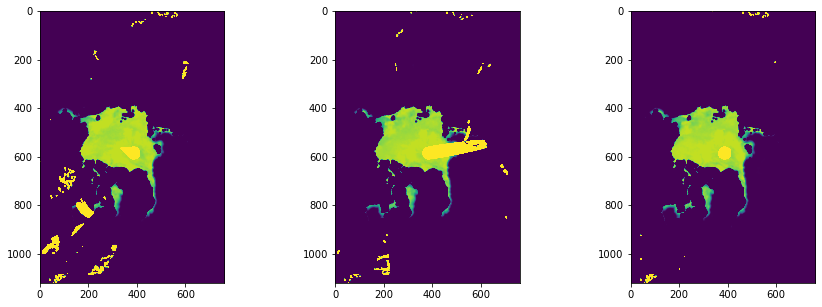

In [3]:
sic_dir = '/Data/sat/downloads/osi_ice_conc_nh_postere'

sic_26 = get_osi_sic(sic_dir, dt.datetime(2012,11,26), force_grb=True, improve=False)
sic_27 = get_osi_sic(sic_dir, dt.datetime(2012,11,27), force_grb=True, improve=False)
sic_28 = get_osi_sic(sic_dir, dt.datetime(2012,11,28), force_grb=True, improve=False)

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(sic_26, clim=[0,1.1])
ax[1].imshow(sic_27, clim=[0,1.1])
ax[2].imshow(sic_28, clim=[0,1.1])
plt.show()

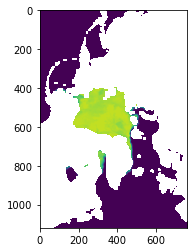

In [4]:
## 1. FILL GAPS IN SIC
dates2fix = [
    {'A': 20121126, 'B': 20121128, 'C': 20121127},
]

for date2fix in dates2fix:
    fill_gap_sic(sic_dir, date2fix['A'], date2fix['B'], date2fix['C'])

sic_27 = get_osi_sic(sic_dir, dt.datetime(2012,11,27))
plt.imshow(sic_27, clim=[0,1.1])

In [5]:
sid_dir = '/Data/sat/downloads/osi405c_demo_archive'
sid_files = sorted(glob.glob(f'{sid_dir}/ice_drift_nh_polstere-625_multi-oi_{glob_mask}.nc'))[start:stop]
sid_file = sid_files[0]
uvf = None

In [ ]:
u, v, f = get_osi_uvf(sid_file)
sid_date = get_osi_date(sid_file)
c = get_osi_sic(sic_dir, sid_date)
u1, v1, c1, uvf = fill_func(u, v, c, sid_dom_x=sid_dom_x, sic_dom=sic_dom, uvf0=uvf, footprint=footprint, min_conc=min_conc, zf=zf)

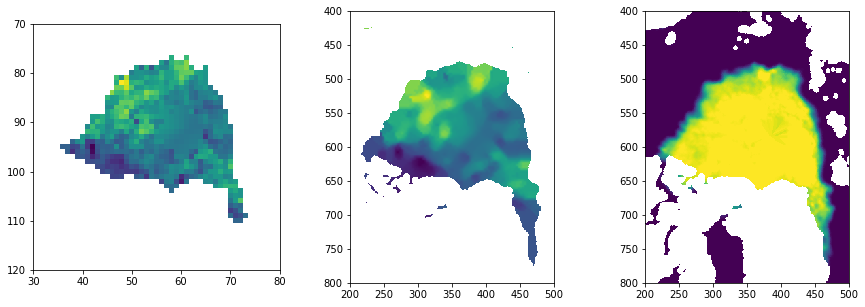

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(u, interpolation='nearest')
ax[0].set_ylim([120,70])
ax[0].set_xlim([30, 80])
ax[1].imshow(u1, interpolation='nearest')
ax[1].set_xlim([200, 500])
ax[1].set_ylim([800, 400])
ax[2].imshow(c1, interpolation='nearest')
ax[2].set_xlim([200, 500])
ax[2].set_ylim([800, 400])
plt.show()
